In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization
import visualkeras

In [3]:
labels_csv = pd.read_csv('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\\Codes\\Dog-Breed-Classification-using-Ensemble-Pretrained-Models-main\\labels.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]
data_train = pathlib.Path('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\Dataset\\120dog breeds-224\\train')
data_test = pathlib.Path('E:\\dx\\Level 6\\Project\\Topic-Ensemble Model for the Classification of Dog Breed\\Dataset\\120dog breeds-224\\train')

In [4]:
batch_size = 16
img_size = 224

In [5]:
datagen = ImageDataGenerator(preprocessing_function = keras.applications.resnet50.preprocess_input, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset='training',
                        x_col='id',
                        y_col='breed',
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode='sparse',
                        color_mode='rgb',
                        target_size=(img_size, img_size))

validation_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset='validation',
                        x_col='id', 
                        y_col='breed',
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode='sparse',
                        color_mode='rgb',
                        target_size=(img_size, img_size))

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [6]:
resnet50 = keras.applications.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in resnet50.layers:
    layer.trainable=False

model = Sequential()
model.add(resnet50)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              #loss='categorical_crossentropy',
              #loss='SparseSoftmaxCrossEntropyWithLogits',
              #loss='SparseSoftmaxCrossEntropyWithLogits',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       8192      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0

In [7]:
history_res = model.fit(train_generator, epochs=50, verbose = 1,
                       validation_data=validation_generator)

Epoch 1/50
512/512 [==============================] - 361s 698ms/step - loss: 3.6108 - accuracy: 0.2596 - val_loss: 2.0608 - val_accuracy: 0.6287
Epoch 2/50
512/512 [==============================] - 361s 705ms/step - loss: 1.7963 - accuracy: 0.6011 - val_loss: 1.1962 - val_accuracy: 0.7216
Epoch 3/50
512/512 [==============================] - 357s 698ms/step - loss: 1.1925 - accuracy: 0.7090 - val_loss: 0.9544 - val_accuracy: 0.7412
Epoch 4/50
512/512 [==============================] - 368s 718ms/step - loss: 0.9354 - accuracy: 0.7523 - val_loss: 0.8536 - val_accuracy: 0.7500
Epoch 5/50
512/512 [==============================] - 347s 678ms/step - loss: 0.7861 - accuracy: 0.7792 - val_loss: 0.8074 - val_accuracy: 0.7520
Epoch 6/50
512/512 [==============================] - 341s 667ms/step - loss: 0.6766 - accuracy: 0.8099 - val_loss: 0.7690 - val_accuracy: 0.7603
Epoch 7/50
512/512 [==============================] - 356s 695ms/step - loss: 0.6040 - accuracy: 0.8298 - val_loss: 0.7583 -

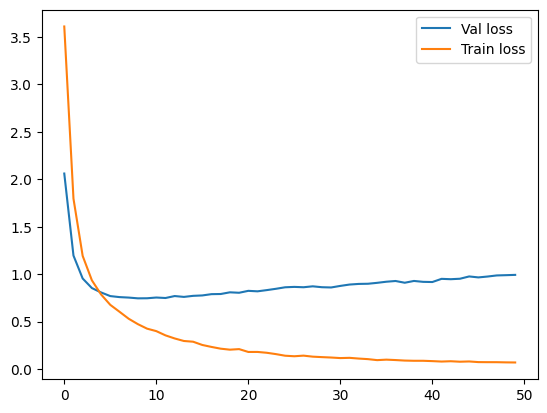

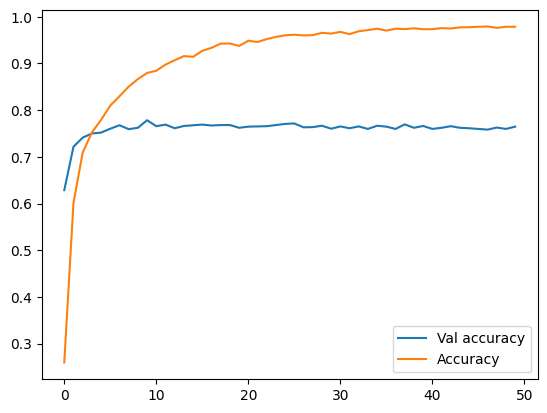

In [8]:
plt.figure()
plt.plot(history_res .history['val_loss'], label = 'Val loss')
plt.plot(history_res .history['loss'], label = 'Train loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(history_res .history['val_accuracy'], label = 'Val accuracy')
plt.plot(history_res .history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

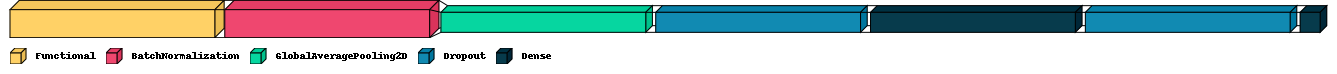

In [9]:
visualkeras.layered_view(model,  legend=True)